##Tina Tran final project...


#Looking at an economic standpoint:



I created a formula that caluculated what would be the best neighborhood in Pittsburgh based off of the median housing sales from 2010 (the only avaiable dataset found), the percent of vacant units, and the percent of house owners. I choose these criteria because I believe that the best neighborhood is based off of housing prices and the type of population who lives there.

Loooking at an economic standpoint



I created a formula that caluculated what would be the best neighborhood in Pittsburgh based off of the median housing sales from 2010 (the only avaiable dataset found), the percent of vacant units, and the percent of house owners. I choose these criteria because i believe that the best neighborhood is based off of housing prices and the type of population who lives there. 

(where I read my dataset)

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

house = pd.read_csv('housing.csv', sep=',', encoding='utf-8') 
 


(renaming columns to clean my data)

In [90]:

house.rename(columns={'Sector #': 'Sector', '% Occupied Units (2010)': 'Occupied_Units_2010'}, inplace=True)


print(house.columns)


Index(['Neighborhood', 'Sector', 'Population (2010)', 'Total # Units (2000)',
       'Total # Units (2010)', 'Occupied_Units_2010', '% Vacant Units (2010)',
       '# Occupied Units (2010)', '% Owner Occupied Units (2010)',
       '% Renter Occupied Units (2010)', 'Est. Avg. Yrs. of Residence (2010)',
       '% Living in Household (2010)', '% Living in Group Quarters (2010)',
       '% Units Built 00-09', '% Units Built 90-99', '% Units Built 80-89',
       '% Units Built 60-79', '% Units Built 40-59',
       '% Units Built before 1939', 'Median Home Value (2000)',
       'Med. Val. ('00 in '10 Dollars)', 'Median Home  Value (2010)',
       '% Change Real Value 2000-2010', 'Median Sale Price (2010)',
       '# Sales Counted (2010)', 'Foreclosures (2008)', 'Foreclosures (2010)',
       '% of all Housing Units Foreclosed (2010)'],
      dtype='object')


(down below is a plot of the population of each neighborhood which I also believe plays a huge role in which neighbordhood is the best in Pittsburgh.)


the neighborhood with the greatest population is Windgap at 15k while the neighborhood with the lowest population is allegheny center at 11.

Missing values: Neighborhood         0
Population (2010)    0
dtype: int64
Top 3 neighborhoods with the highest Population (2010):
           Neighborhood  Population (2010)
76  Squirrel Hill South              15110
67            Shadyside              13915
13            Brookline              13214

Bottom 3 neighborhoods with the lowest Population (2010):
   Neighborhood  Population (2010)
21      Chateau                 11
70  South Shore                 19
77    St. Clair                209


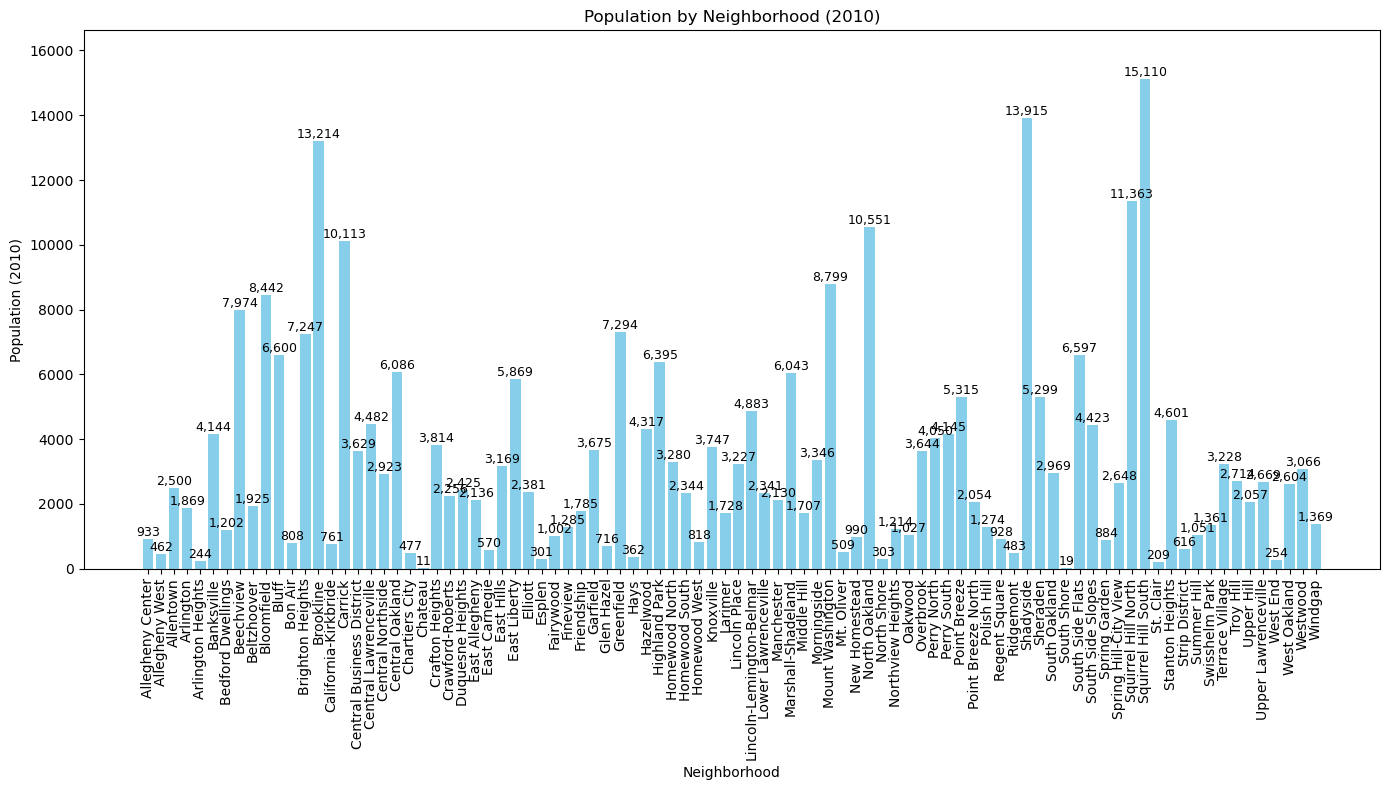

In [92]:
house.columns = house.columns.str.strip()

house['Population (2010)'] = house['Population (2010)'].replace({',': ''}, regex=True)
house['Population (2010)'] = pd.to_numeric(house['Population (2010)'], errors='coerce')


print("Missing values:", house[['Neighborhood', 'Population (2010)']].isna().sum())


house_cleaned = house.dropna(subset=['Neighborhood', 'Population (2010)'])


house_cleaned = house.dropna(subset=['Neighborhood', 'Population (2010)'])

top_3 = house_cleaned[['Neighborhood', 'Population (2010)']].nlargest(3, 'Population (2010)')
bottom_3 = house_cleaned[['Neighborhood', 'Population (2010)']].nsmallest(3, 'Population (2010)')


print("Top 3 neighborhoods with the highest Population (2010):")
print(top_3)
print("\nBottom 3 neighborhoods with the lowest Population (2010):")
print(bottom_3)




plt.figure(figsize=(14, 8))  

bars = plt.bar(house_cleaned['Neighborhood'], house_cleaned['Population (2010)'], color='skyblue')

plt.xlabel('Neighborhood')
plt.ylabel('Population (2010)')
plt.title('Population by Neighborhood (2010)')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=90)

plt.ylim(0, house_cleaned['Population (2010)'].max() * 1.1) 

plt.tight_layout()

plt.show()



right here we have the median home value in each pittsburgh neighborhood




<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Monkg\AppData\Local\Temp\ipykernel_32740\42905646.py:2: SyntaxWarning: invalid escape sequence '\$'
  '\$': '',


Top 3 neighborhoods with the highest Median Home Value (2010):
           Neighborhood  Median Home  Value (2010)
75  Squirrel Hill North                   344900.0
55        North Oakland                   273000.0
67            Shadyside                   264860.0

Bottom 3 neighborhoods with the lowest Median Home Value (2010):
     Neighborhood  Median Home  Value (2010)
10          Bluff                    21200.0
86       West End                    29800.0
42  Homewood West                    34500.0


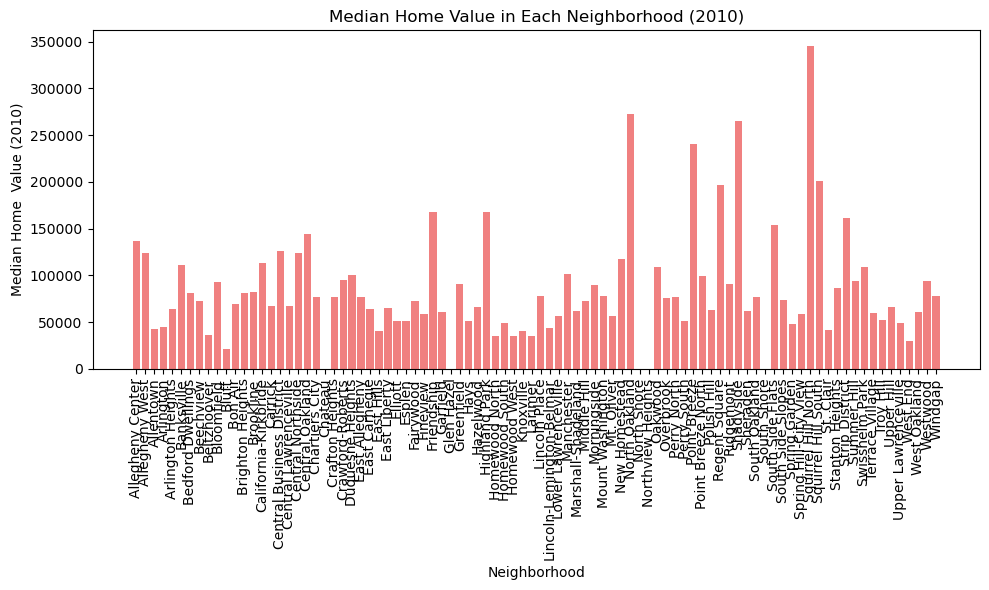

In [94]:
house['Median Home  Value (2010)'] = house['Median Home  Value (2010)'].replace({
    '\$': '', 
    ',': '', 
    '%': ''   
}, regex=True)

house['Median Home  Value (2010)'] = pd.to_numeric(house['Median Home  Value (2010)'], errors='coerce')


house['Median Home  Value (2010)'] = pd.to_numeric(house['Median Home  Value (2010)'], errors='coerce')

top_3 = house[['Neighborhood', 'Median Home  Value (2010)']].nlargest(3, 'Median Home  Value (2010)')

bottom_3 = house[['Neighborhood', 'Median Home  Value (2010)']].nsmallest(3, 'Median Home  Value (2010)')

print("Top 3 neighborhoods with the highest Median Home Value (2010):")
print(top_3)
print("\nBottom 3 neighborhoods with the lowest Median Home Value (2010):")
print(bottom_3)


plt.figure(figsize=(10, 6)) 
plt.bar(house['Neighborhood'], house['Median Home  Value (2010)'], color='lightcoral')

plt.xlabel('Neighborhood')
plt.ylabel('Median Home  Value (2010)')
plt.title('Median Home Value in Each Neighborhood (2010)')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()



more cleaning data...

here you can see the formula used to caluclate the composite score for which neighborhood in pittsburgh is the best. Lookung at the median home value is the greatest impact on weather or not the nieghborhood scores high or not.

Cleaned columns preview:
        Neighborhood  Median Home  Value (2010)  \
0   Allegheny Center                   136300.0   
1     Allegheny West                   123600.0   
2          Allentown                    42200.0   
3          Arlington                    44200.0   
4  Arlington Heights                    64400.0   

   % Owner Occupied Units (2010)  % Vacant Units (2010)  
0                          0.101                  0.485  
1                          0.182                  0.251  
2                          0.592                  0.200  
3                          0.654                  0.134  
4                          0.187                  0.088  
Rows after cleaning and dropping NaN values: 85


C:\Users\Monkg\AppData\Local\Temp\ipykernel_32740\4056011115.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_cleaned['composite_score'] = (house_cleaned['Median Home  Value (2010)'] * 0.6) + \
C:\Users\Monkg\AppData\Local\Temp\ipykernel_32740\4056011115.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighborhood', y='composite_score', data=top_neighborhoods, palette='viridis')


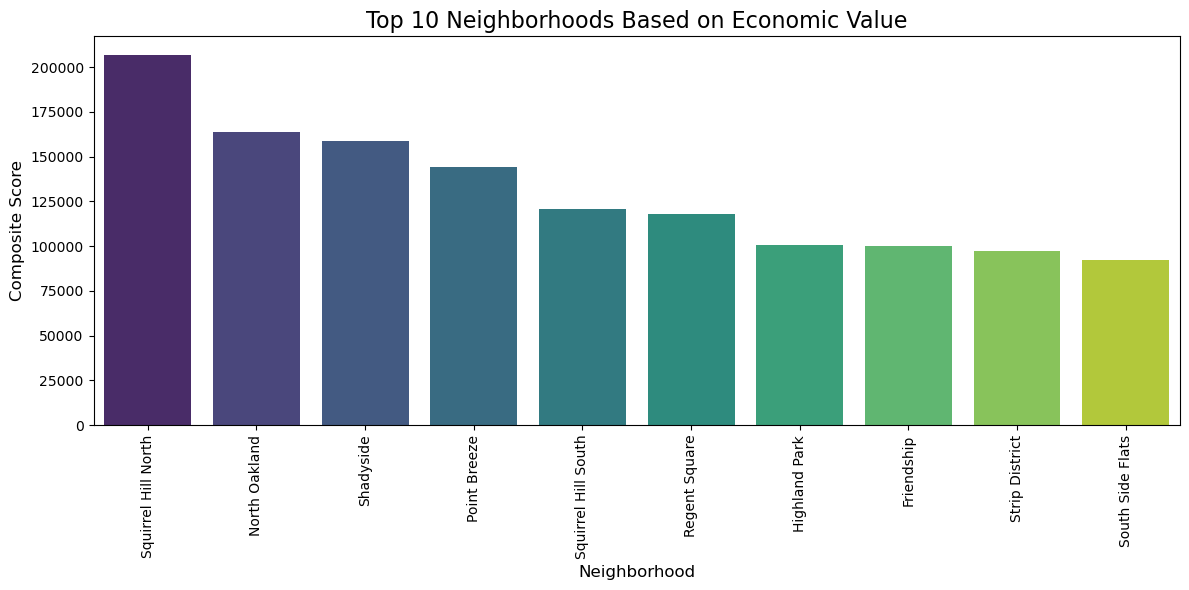

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to clean the data
def clean_column(col):
    # If the column is already a numeric value, return it as is
    if isinstance(col, (int, float)):
        return col

    # If the column is a string with commas or percentages, process accordingly
    if isinstance(col, str):
        col = col.replace(',', '')  # Remove commas
        col = col.strip()  # Strip any extra spaces
        
        # Check if there is a percent sign and remove it, convert to decimal
        if '%' in col:
            col = col.replace('%', '')  # Remove the '%' symbol
            try:
                col = float(col) / 100  # Convert to percentage
            except ValueError:
                col = None  # Set to None if conversion fails
        else:
            try:
                col = float(col)  # Convert to float
            except ValueError:
                col = None  # Set to None if conversion fails
    return col

# Load your data (replace this with your actual data loading code)
# house = pd.read_csv('your_data.csv')  # Example for loading data

# Clean relevant columns
house['% Owner Occupied Units (2010)'] = house['% Owner Occupied Units (2010)'].apply(lambda x: clean_column(x))
house['% Vacant Units (2010)'] = house['% Vacant Units (2010)'].apply(lambda x: clean_column(x))
house['Median Home  Value (2010)'] = house['Median Home  Value (2010)'].apply(lambda x: clean_column(x))

# Check cleaned data
print("Cleaned columns preview:")
print(house[['Neighborhood', 'Median Home  Value (2010)', '% Owner Occupied Units (2010)', '% Vacant Units (2010)']].head())

# Drop rows where necessary columns contain NaN values
house_cleaned = house.dropna(subset=['Median Home  Value (2010)', '% Owner Occupied Units (2010)', '% Vacant Units (2010)'])

# Check if we have valid rows after cleaning
print(f"Rows after cleaning and dropping NaN values: {len(house_cleaned)}")
if len(house_cleaned) == 0:
    print("No valid data to process after cleaning.")
else:
    # Compute the composite score
    house_cleaned['composite_score'] = (house_cleaned['Median Home  Value (2010)'] * 0.6) + \
                                       (house_cleaned['% Owner Occupied Units (2010)'] * 0.2) - \
                                       (house_cleaned['% Vacant Units (2010)'] * 0.2)

    # Sort neighborhoods by composite score and get the top 10
    top_neighborhoods = house_cleaned.sort_values(by='composite_score', ascending=False).head(10)

    # Plot the results
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Neighborhood', y='composite_score', data=top_neighborhoods, palette='viridis')
    plt.title('Top 10 Neighborhoods Based on Economic Value', fontsize=16)
    plt.xlabel('Neighborhood', fontsize=12)
    plt.ylabel('Composite Score', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()





In conclusion the best neighborhood in pittsburgh is Squirrel Hill north as it scores the highest in composite score. As well as placing in the top 3 in each category as well. This seems really reasonable to me as squirrel hill is full of diversity and culture which I belive makes a great neighborhood. I have personally been there plenty of times to get food and boba with friends and also walking around all the different shops. I highly reccomend visiting.